<a href="https://colab.research.google.com/github/VictorThrive/AgricConnect-PHL/blob/master/Python/Combined%20Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Loading the dataset


df_comb=pd.read_excel('https://github.com/VictorThrive/AgricConnect-PHL/raw/master/dataset/other_datasets/combined_metrics.xlsx')

df_comb.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),566,Nigeria,511,Total Population - Both sexes,S2501,Population,2010,1000 No,160952.85,X,Figure from international organizations
1,FBS,Food Balances (2010-),566,Nigeria,511,Total Population - Both sexes,S2501,Population,2011,1000 No,165463.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),566,Nigeria,511,Total Population - Both sexes,S2501,Population,2012,1000 No,170075.93,X,Figure from international organizations
3,FBS,Food Balances (2010-),566,Nigeria,511,Total Population - Both sexes,S2501,Population,2013,1000 No,174726.12,X,Figure from international organizations
4,FBS,Food Balances (2010-),566,Nigeria,511,Total Population - Both sexes,S2501,Population,2014,1000 No,179379.02,X,Figure from international organizations


## Data Understanding

In [4]:
df_comb.shape


(16974, 13)

In [8]:
#Checking for missing values

df_comb.isnull().sum().sort_values(ascending = False)

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (FBS),0
Item,0
Year,0
Unit,0


In [9]:
#Checking for Duplicate

df_comb.duplicated().sum()

np.int64(0)

## Trend of Post-Harvest Losses Over the Years

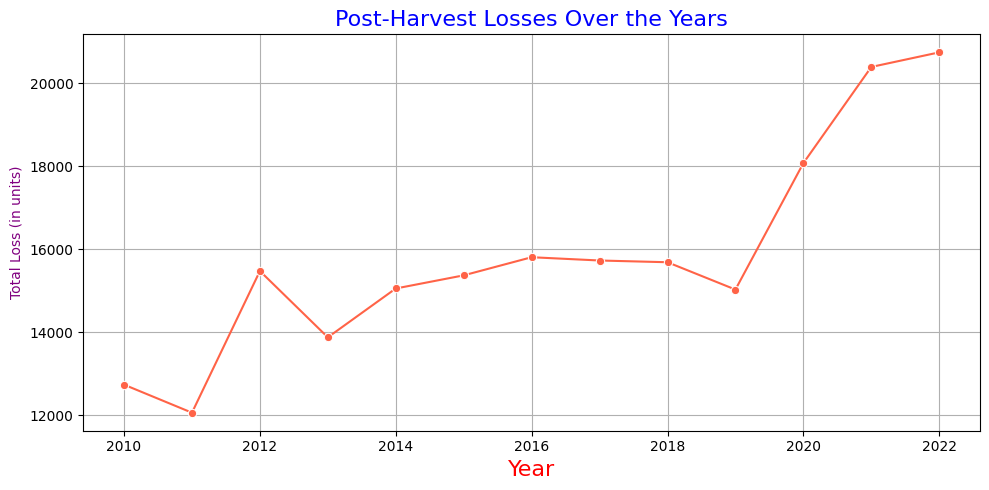

In [22]:

losses = df_comb[df_comb['Element'] == 'Losses']
loss_trend = losses.groupby('Year')['Value'].sum().reset_index()


#Plotting
plt.figure(figsize=(10,5))
sns.lineplot(data=loss_trend, x='Year', y='Value', marker='o', color='tomato')
plt.title('Post-Harvest Losses Over the Years', fontsize=16,color = 'blue')
plt.xlabel('Year',fontsize=16,color= 'red')
plt.ylabel('Total Loss (in units)',color='purple')
plt.grid(True)
plt.tight_layout()
plt.show()


## Top 10 Commodities by Total Losses

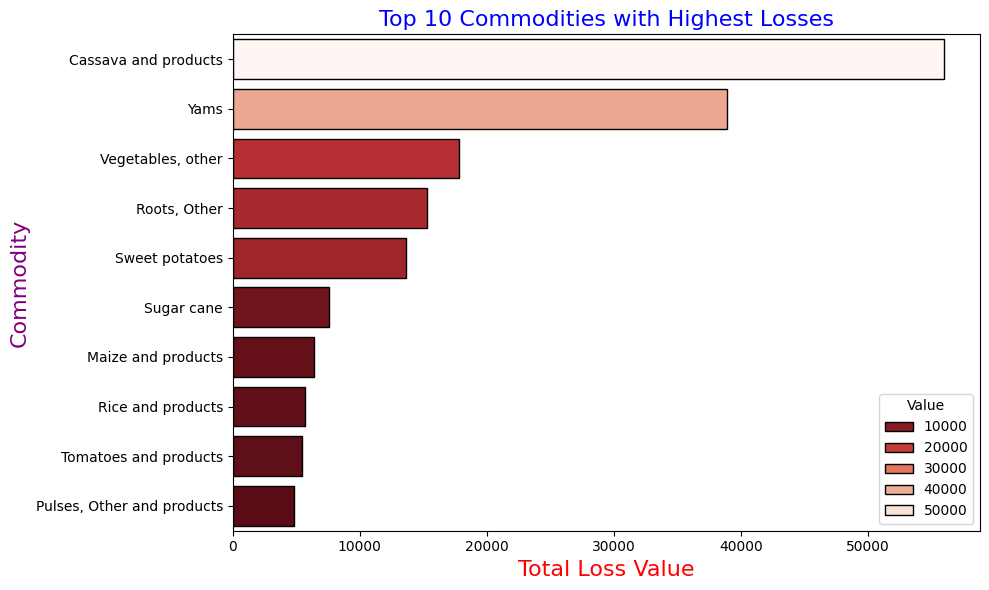

In [25]:
top_items_loss = losses.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)


#Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_items_loss.values, y=top_items_loss.index,
            palette='Reds_r',hue=top_items_loss, edgecolor='black')
plt.title('Top 10 Commodities with Highest Losses',fontsize=16, color='blue')
plt.xlabel('Total Loss Value',color ='red',fontsize=16)
plt.ylabel('Commodity',fontsize=16,color='purple')
plt.tight_layout()
plt.show()


## Loss Composition (Pie Chart) by Commodity

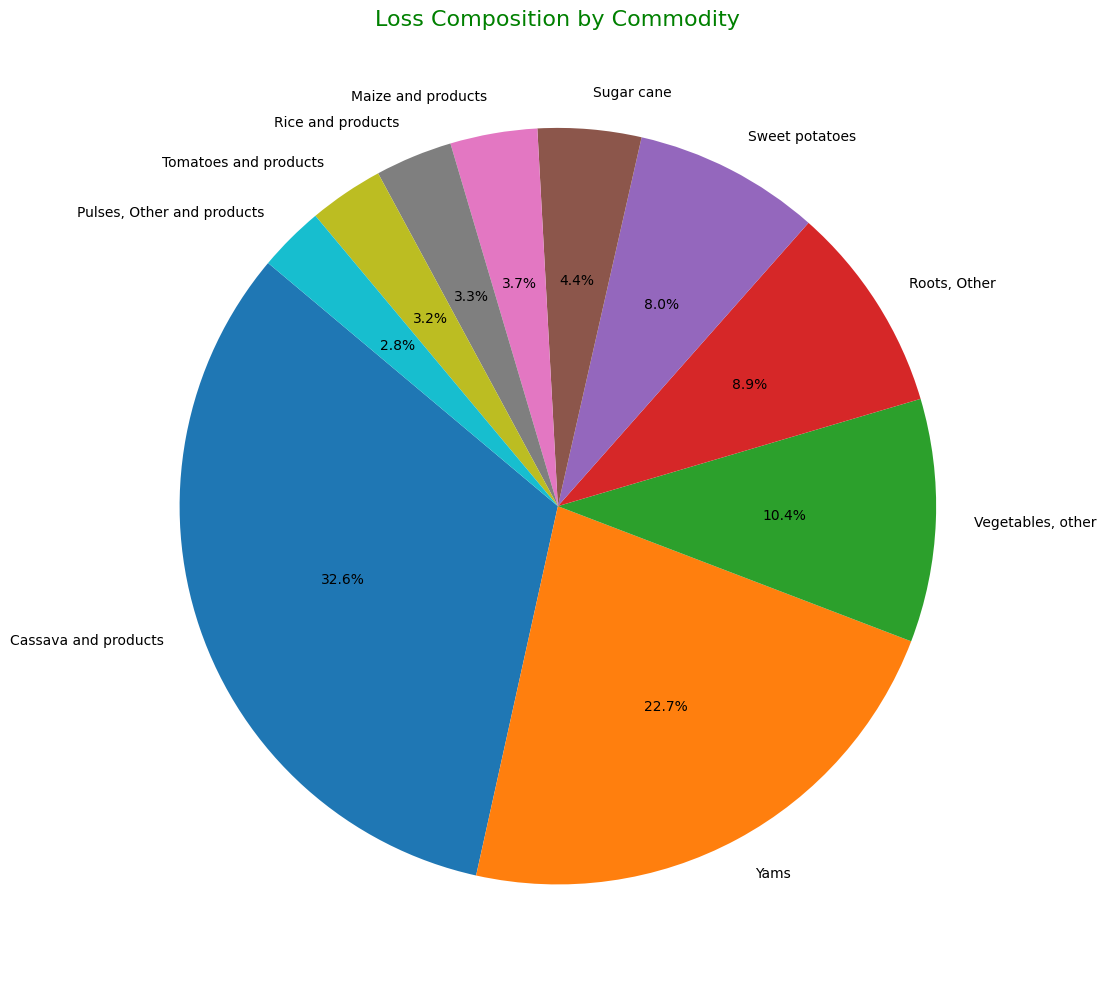

In [29]:
top_items_loss_pct = top_items_loss / top_items_loss.sum() * 100

plt.figure(figsize=(12,10))
plt.pie(top_items_loss_pct, labels=top_items_loss_pct.index, autopct='%1.1f%%', startangle=140)
plt.title('Loss Composition by Commodity',fontsize =16,color='green')
plt.tight_layout()
plt.show()
